##Dataset and library Import

In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/rishianand/devanagari-character-set?select=data.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yugdesai310
Your Kaggle Key: ··········


100%|██████████| 118M/118M [00:00<00:00, 160MB/s]


In [ ]:
Data_File = "/content/devanagari-character-set/data.csv"

In [ ]:
import csv
import string
import numpy as np
from PIL import Image as im
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.keras.utils import to_categorical

##Data Preprocessing

In [ ]:
with open(Data_File) as daf:
  csv_reader = csv.reader(daf, delimiter = ',')
  csv_list = list()
  for i in csv_reader:
    csv_list.append(i)
  df = pd.DataFrame(csv_list)
  #print(df)

In [ ]:
header = df.iloc[0]
df = df[1:]
df.columns = header
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [ ]:
df.tail()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
91996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
92000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9


In [ ]:
df.shape

(92000, 1025)

In [ ]:
df["character"].unique()

array(['character_01_ka', 'character_02_kha', 'character_03_ga',
       'character_04_gha', 'character_05_kna', 'character_06_cha',
       'character_07_chha', 'character_08_ja', 'character_09_jha',
       'character_10_yna', 'character_11_taamatar', 'character_12_thaa',
       'character_13_daa', 'character_14_dhaa', 'character_15_adna',
       'character_16_tabala', 'character_17_tha', 'character_18_da',
       'character_19_dha', 'character_20_na', 'character_21_pa',
       'character_22_pha', 'character_23_ba', 'character_24_bha',
       'character_25_ma', 'character_26_yaw', 'character_27_ra',
       'character_28_la', 'character_29_waw', 'character_30_motosaw',
       'character_31_petchiryakha', 'character_32_patalosaw',
       'character_33_ha', 'character_34_chhya', 'character_35_tra',
       'character_36_gya', 'digit_0', 'digit_1', 'digit_2', 'digit_3',
       'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9'],
      dtype=object)

In [ ]:
character_list = list(df["character"].unique())

Labeling characters from 10 to 35

In [ ]:
data_list = csv_list[1:]
#print(last_label)
#print(data_list)
#data_with_label
#print("Total no of rows:", len(data_list))
name_of_char = set()
label_to_char = dict()
for i in range(len(data_list)):
  last_label = data_list[i][1024]
  if last_label[0] == 'c':
    label_to_char[(9 + int(last_label[10:12]))] = last_label
    data_list[i][1024] = (9 + int(last_label[10:12]))
    
    name_of_char.add(last_label[14:])
  elif last_label[0]=='d':
    label_to_char[int(last_label[6:])] = last_label
    data_list[i][1024]=last_label[6:]
df2 = pd.DataFrame(data_list)

In [ ]:
df2.head()
#df2["1024"].unique()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [ ]:
df2.tail()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
91995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
91996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
91997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
91998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
91999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
df.shape

(92000, 1025)

##Data Split (8:2)



In [ ]:
perc = 0.8

random.shuffle(data_list)
train_amt = int(len(data_list)*perc)
test_amt = len(data_list)-train_amt

Train_data = np.array(data_list[:train_amt+1], dtype = float)
Test_data = np.array(data_list[train_amt+1:], dtype = float)

TrainLabels = Train_data[:,1024]
TestLabels = np.array(Test_data[:,1024], dtype = float)
TrainImages = np.array(Train_data[:,:1024], dtype = float)
TestImages = np.array(Test_data[:,:1024], dtype = float)


In [ ]:
TrainImages = np.reshape(TrainImages, (73601,32,32))
TestImages = np.reshape(TestImages, (18399,32,32))

In [ ]:
print(f"Training images has shape: {TrainImages.shape} and dtype: {TrainImages.dtype}")
print(f"Training labels has shape: {TrainLabels.shape} and dtype: {TrainLabels.dtype}")
print(f"Validation images has shape: {TestImages.shape} and dtype: {TestImages.dtype}")
print(f"Validation labels has shape: {TestLabels.shape} and dtype: {TestLabels.dtype}")

Training images has shape: (73601, 32, 32) and dtype: float64
Training labels has shape: (73601,) and dtype: float64
Validation images has shape: (18399, 32, 32) and dtype: float64
Validation labels has shape: (18399,) and dtype: float64


##Data Visualization

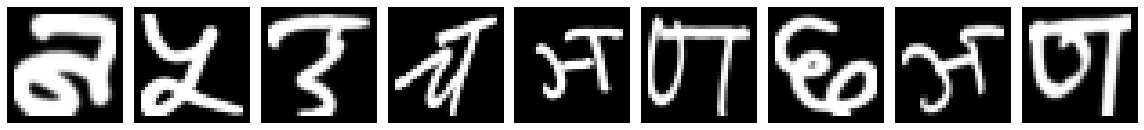

In [ ]:
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 9, figsize=(16, 15))
  axes = axes.flatten()
  letters = character_list

  for k in range(9):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    #ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(TrainImages, TrainLabels)

##Data Augmentation

In [ ]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
 
  #Increasing the dimension of the image from 32,32 to 32,32,1.
  training_images = np.expand_dims(training_images, axis = 3)
  validation_images = np.expand_dims(validation_images, axis = 3)

  #Augmenting the data with appropriate parameters.
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 10,
                                     width_shift_range = 0.1,
                                     height_shift_range = 0.1,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     fill_mode = 'nearest',
                                     )


  # Pass in the appropriate arguments to the flow method
  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32) 

  
  # Instantiate the ImageDataGenerator class for validation set(don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1./255,
                                     )

  # Pass in the appropriate arguments to the flow method
  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32) 

  ### END CODE HERE

  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TrainImages, TrainLabels, TestImages, TestLabels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (73601, 32, 32, 1)
Labels of training generator have shape: (73601,)
Images of validation generator have shape: (18399, 32, 32, 1)
Labels of validation generator have shape: (18399,)


In [ ]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

##Convolutional Neural Network with Adam Optimizer


In [ ]:
def create_model_CNN_Adam():

  
  # Defining the model
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(46, activation = 'softmax')
  ])
  

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

  ### END CODE HERE       
  
  return model

In [ ]:
model = create_model_CNN_Adam()
model.summary()

# Train your model
history = model.fit(train_generator,
                    epochs=25,
                    validation_data = validation_generator)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

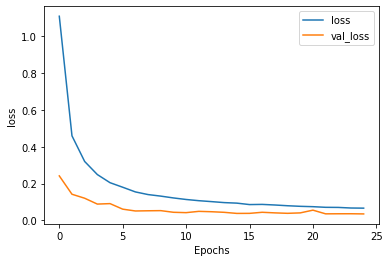

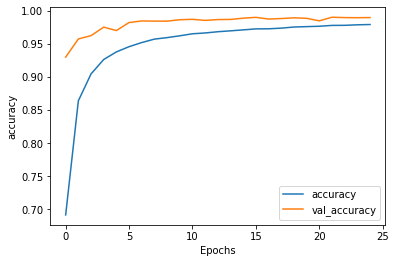

In [ ]:
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
model.save('/gdrive/MyDrive/Minor_Project/CNN_Adam')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Lenet-5 Model with Adam Optimizer

In [ ]:
def lenet_model_Adam():
  lenet_5_model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(32,32,1), padding='same'), #C1
      tf.keras.layers.AveragePooling2D(), #S2
      tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
      tf.keras.layers.AveragePooling2D(), #S4
      tf.keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
      tf.keras.layers.Flatten(), #Flatten    
      tf.keras.layers.Dense(84, activation='tanh'), #F6
      tf.keras.layers.Dense(46, activation='softmax') #Output layer
  ])

  lenet_5_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

  return lenet_5_model

In [ ]:
model = lenet_model_Adam()
model.summary()

# Train your model
history = model.fit(train_generator,
                    epochs=25,
                    validation_data = validation_generator)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten_3 (Flatten)         (None, 480)              

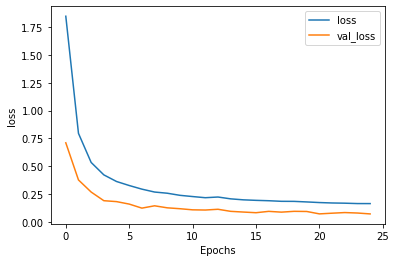

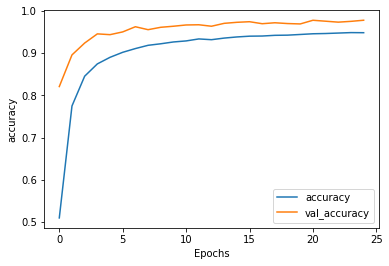

In [ ]:
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')

In [ ]:
model.save('/gdrive/MyDrive/Minor_Project/LeNet5_Adam')

##Convolutional Neural Network with RMSprop Optimizer

In [ ]:
def create_model_CNN_RMSprop():

  
  # Defining the model
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(46, activation = 'softmax')
  ])
  

  model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0005),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

  ### END CODE HERE       
  
  return model

In [ ]:
model = create_model_CNN_RMSprop()
model.summary()

# Train your model
history = model.fit(train_generator,
                    epochs=25,
                    validation_data = validation_generator)

2301/2301 [==============================] - 43s 18ms/step - loss: 1.1095 - accuracy: 0.6893 - val_loss: 0.2671 - val_accuracy: 0.9185
Epoch 2/25
2301/2301 [==============================] - 34s 15ms/step - loss: 0.4451 - accuracy: 0.8687 - val_loss: 0.1426 - val_accuracy: 0.9568
Epoch 3/25
2301/2301 [==============================] - 34s 15ms/step - loss: 0.3089 - accuracy: 0.9095 - val_loss: 0.1019 - val_accuracy: 0.9692
Epoch 4/25
2301/2301 [==============================] - 37s 16ms/step - loss: 0.2405 - accuracy: 0.9281 - val_loss: 0.0724 - val_accuracy: 0.9778
Epoch 5/25
2301/2301 [==============================] - 33s 14ms/step - loss: 0.2094 - accuracy: 0.9382 - val_loss: 0.0669 - val_accuracy: 0.9778
Epoch 6/25
2301/2301 [==============================] - 36s 16ms/step - loss: 0.1870 - accuracy: 0.9439 - val_loss: 0.0567 - val_accuracy: 0.9823
Epoch 7/25
2301/2301 [==============================] - 33s 15ms/step - loss: 0.1793 - accuracy: 0.9463 - val_loss: 0.0605 - val_accura

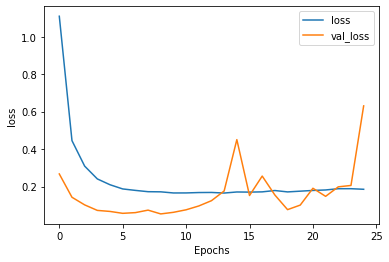

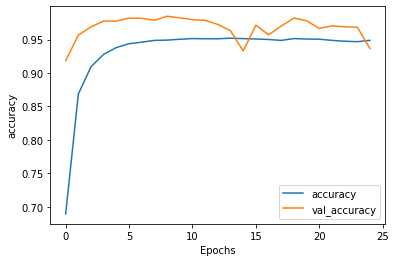

In [ ]:
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')

In [ ]:
model.save('/gdrive/MyDrive/Minor_Project/CNN_RMSprop')

##Lenet-5 Model with RMSprop Optimizer

In [ ]:
def lenet_model_RMSprop():
  lenet_5_model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(32,32,1), padding='same'), #C1
      tf.keras.layers.AveragePooling2D(), #S2
      tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
      tf.keras.layers.AveragePooling2D(), #S4
      tf.keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
      tf.keras.layers.Flatten(), #Flatten    
      tf.keras.layers.Dense(84, activation='tanh'), #F6
      tf.keras.layers.Dense(46, activation='softmax') #Output layer
  ])

  lenet_5_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0005),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

  return lenet_5_model

In [ ]:
model = lenet_model_RMSprop()
model.summary()

# Train your model
history = model.fit(train_generator,
                    epochs=25,
                    validation_data = validation_generator)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_16 (Conv2D)          (None, 2, 2, 120)         48120     
                                                                 
 flatten_6 (Flatten)         (None, 480)              

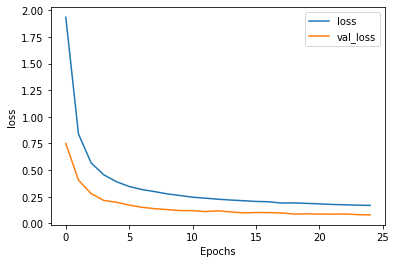

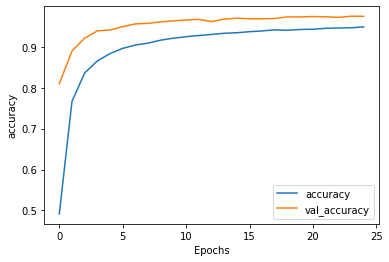

In [ ]:
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')

In [ ]:
model.save('/gdrive/MyDrive/Minor_Project/LeNet5_RMSprop')

##Model Prediction

In [ ]:
import csv
import string
import numpy as np
from PIL import Image as im
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.keras.utils import to_categorical
from google.colab import files
from io import BytesIO

uploaded = files.upload()

Saving ba.png to ba.png


In [ ]:
lt=list(uploaded.keys())
img = im.open(BytesIO(uploaded[lt[0]]))

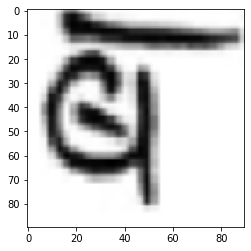

In [ ]:
#import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

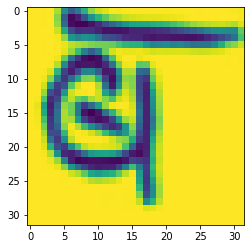

In [ ]:
img=img.resize((32,32))
img = img.convert("L")
plt.imshow(img)
plt.show()

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Minor_Project/CNN_Adam')

In [ ]:
label_to_char = {10: 'character_01_ka', 11: 'character_02_kha', 12: 'character_03_ga', 13: 'character_04_gha', 14: 'character_05_kna', 15: 'character_06_cha', 16: 'character_07_chha', 17: 'character_08_ja', 18: 'character_09_jha', 19: 'character_10_yna', 20: 'character_11_taamatar', 21: 'character_12_thaa', 22: 'character_13_daa', 23: 'character_14_dhaa', 24: 'character_15_adna', 25: 'character_16_tabala', 26: 'character_17_tha', 27: 'character_18_da', 28: 'character_19_dha', 29: 'character_20_na', 30: 'character_21_pa', 31: 'character_22_pha', 32: 'character_23_ba', 33: 'character_24_bha', 34: 'character_25_ma', 35: 'character_26_yaw', 36: 'character_27_ra', 37: 'character_28_la', 38: 'character_29_waw', 39: 'character_30_motosaw', 40: 'character_31_petchiryakha', 41: 'character_32_patalosaw', 42: 'character_33_ha', 43: 'character_34_chhya', 44: 'character_35_tra', 45: 'character_36_gya', 0: 'digit_0', 1: 'digit_1', 2: 'digit_2', 3: 'digit_3', 4: 'digit_4', 5: 'digit_5', 6: 'digit_6', 7: 'digit_7', 8: 'digit_8', 9: 'digit_9'}

In [ ]:
npim = np.array(img)
#print(npim)
npim = np.expand_dims(npim, axis = 0)
npim = np.expand_dims(npim, axis = -1)
print(npim.shape)
ten_im =tf.convert_to_tensor(npim)

(1, 32, 32, 1)


In [ ]:
predict = new_model.predict(ten_im)
label_to_char[np.argmax(predict)]

1/1 [==============================] - 0s 67ms/step


'character_23_ba'